# Predicci√≥n de ataques card√≠acos

### Dataset trabajado

El conjunto de datos fue recolectado en el **hospital Zheen**, ubicado en **Erbil, Irak**, durante el per√≠odo comprendido entre **enero y mayo de 2019**.  
La base fue publicada por **Rashid, Tarik A. y Hassan, Bryar (2022)** bajo el nombre *‚ÄúHeart Attack Dataset‚Äù* en Mendeley Data (DOI: [10.17632/wmhctcrt5v.1](https://doi.org/10.17632/wmhctcrt5v.1)) y pertenece al √°rea de **Medicina ‚Äì Enfermedades card√≠acas**.

El prop√≥sito de este dataset es **clasificar pacientes con diagn√≥stico positivo o negativo de ataque card√≠aco** a partir de par√°metros fisiol√≥gicos y bioqu√≠micos medidos en hospital.


### Composici√≥n

El dataset posee **9 variables** (columnas) y se organiza de la siguiente manera:

| Variable | Tipo | Descripci√≥n | Valores esperados / Normalizaci√≥n |
|-----------|------|-------------|-----------------------------------|
| **Age** | Num√©rica | Edad del paciente (a√±os) | En adultos: 20‚Äì80 a√±os |
| **Gender** | Binaria | Sexo biol√≥gico del paciente | 1 = masculino, 0 = femenino |
| **Heart Rate** | Num√©rica | Frecuencia card√≠aca (latidos por minuto) | Normal: 60‚Äì100 lpm |
| **Systolic Blood Pressure** | Num√©rica | Presi√≥n arterial sist√≥lica (mmHg) | Normal: 90‚Äì120 mmHg |
| **Diastolic Blood Pressure** | Num√©rica | Presi√≥n arterial diast√≥lica (mmHg) | Normal: 60‚Äì80 mmHg |
| **Blood Sugar** | Binaria | Nivel de glucosa en sangre | 1 = >120 mg/dL (elevado), 0 = ‚â§120 (normal) |
| **CK-MB** | Num√©rica | Enzima card√≠aca liberada por da√±o muscular | Normal: <5 ng/mL |
| **Troponin** | Num√©rica | Prote√≠na card√≠aca espec√≠fica ante lesi√≥n mioc√°rdica | Normal: <0.04 ng/mL |
| **Result** | Binaria | Diagn√≥stico final | 1 = Positivo (ataque card√≠aco), 0 = Negativo |

### Consideraciones cl√≠nicas

- **CK-MB** y **Troponin** son marcadores bioqu√≠micos clave que reflejan da√±o en el m√∫sculo card√≠aco.  
- **Presi√≥n arterial**, **frecuencia card√≠aca** y **glucosa** son indicadores de riesgo cardiovascular.  
- **Edad** y **g√©nero** permiten contextualizar los valores dentro de rangos fisiol√≥gicos esperables.  

### Objetivo del an√°lisis

El objetivo del presente trabajo es **realizar un modelo de Regresi√≥n Log√≠stica Binaria** que permita **predecir la probabilidad de diagn√≥stico positivo (ataque card√≠aco)** a partir de las variables cl√≠nicas mencionadas.  
Se busca identificar cu√°les de ellas influyen significativamente en el resultado, analizando su efecto en t√©rminos de **odds ratio** y **significancia estad√≠stica**.


## 1. An√°lisis exploratorio de los datos (EDA)

Antes de aplicar la regresi√≥n log√≠stica, se realiza un **an√°lisis exploratorio de los datos (EDA)** para comprender la distribuci√≥n de las variables, sus rangos, relaciones y posibles valores at√≠picos.  
Este paso es esencial para validar la calidad de los datos y justificar qu√© variables ser√°n consideradas en el modelo predictivo.

### 1.1 Inspecci√≥n general del dataset
Se verifican la cantidad de registros, los tipos de datos de cada columna y la existencia de valores faltantes.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv("sample_data/Medicaldataset.csv")

# Informaci√≥n general
print("Filas:", df.shape[0], " | Columnas:", df.shape[1])
print("\nTipos de datos:")
print(df.dtypes)

# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isna().sum())

# Vista previa
df.head()


Filas: 1319  | Columnas: 9

Tipos de datos:
Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

Valores faltantes por columna:
Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative

### 1.2 Estad√≠sticos descriptivos y distribuci√≥n de variables

A continuaci√≥n se observan los valores medios, m√≠nimos y m√°ximos de cada variable num√©rica, lo que permite analizar el comportamiento general de la muestra y los rangos fisiol√≥gicos de cada par√°metro.


In [3]:
# Estad√≠sticos descriptivos
df.describe().T.round(2)


count    mean    std    min     25%     50%  \
Age                       1319.0   56.19  13.65  14.00   47.00   58.00   
Gender                    1319.0    0.66   0.47   0.00    0.00    1.00   
Heart rate                1319.0   78.34  51.63  20.00   64.00   74.00   
Systolic blood pressure   1319.0  127.17  26.12  42.00  110.00  124.00   
Diastolic blood pressure  1319.0   72.27  14.03  38.00   62.00   72.00   
Blood sugar               1319.0  146.63  74.92  35.00   98.00  116.00   
CK-MB                     1319.0   15.27  46.33   0.32    1.65    2.85   
Troponin                  1319.0    0.36   1.15   0.00    0.01    0.01   

                             75%     max  
Age                        65.00   103.0  
Gender                      1.00     1.0  
Heart rate                 85.00  1111.0  
Systolic blood pressure   143.00   223.0  
Diastolic blood pressure   81.00   154.0  
Blood sugar               169.50   541.0  
CK-MB                       5.80   300.0  
Troponin                    0.09    10.3

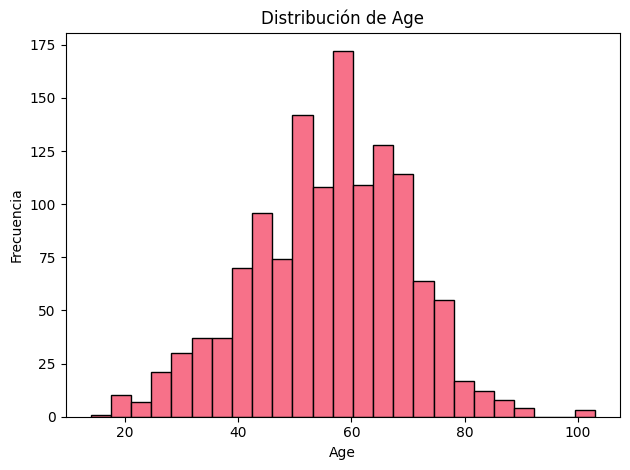

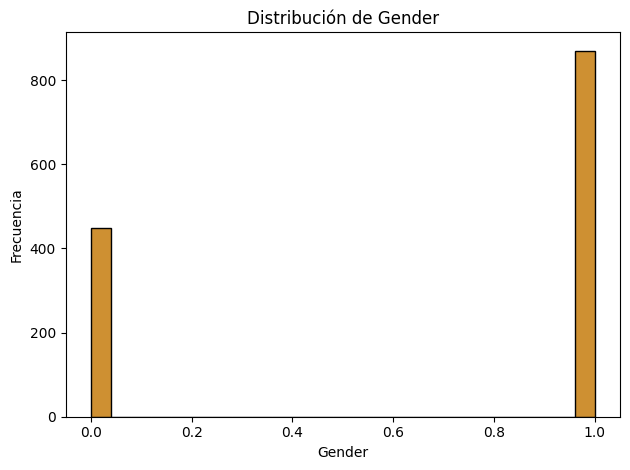

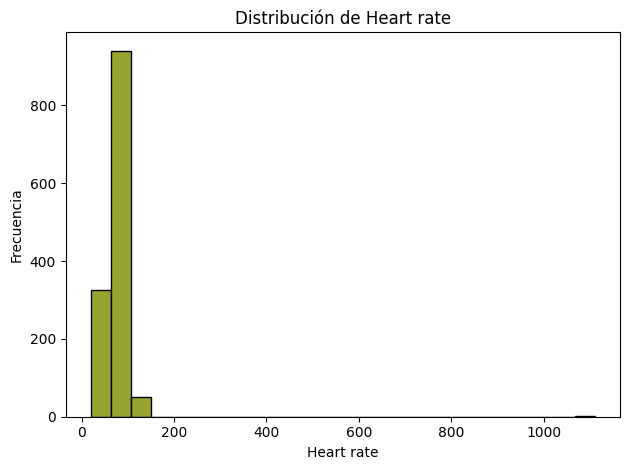

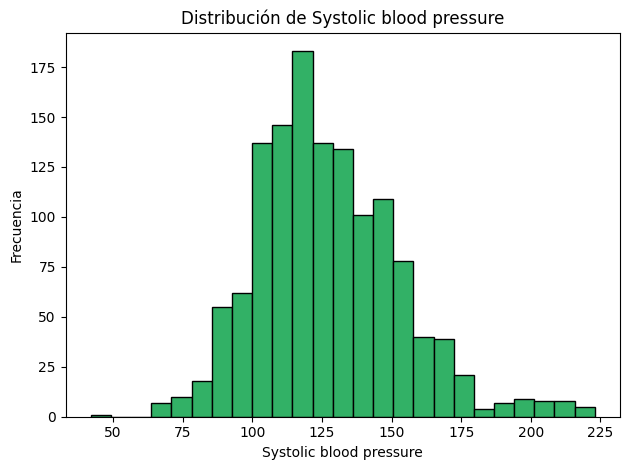

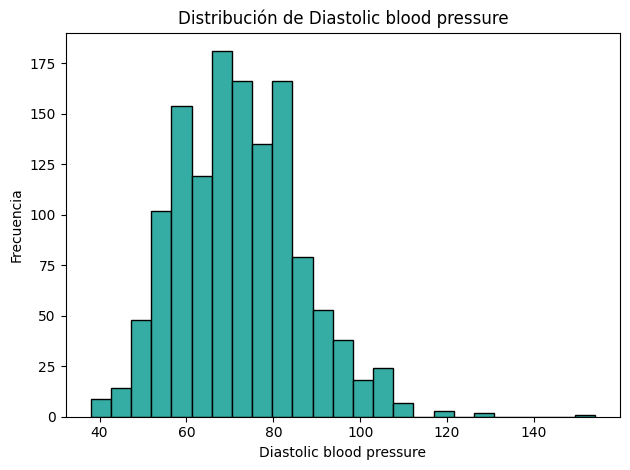

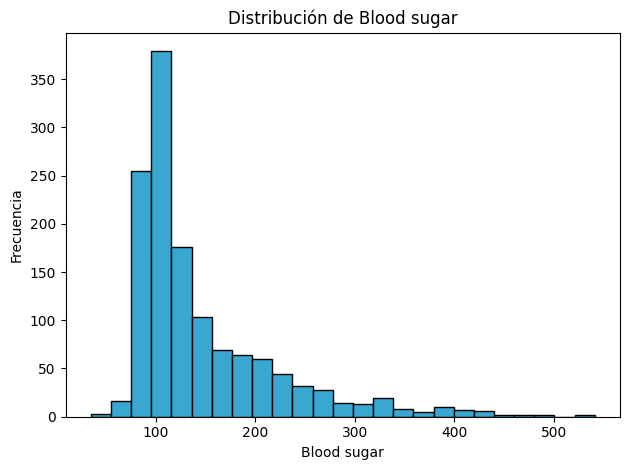

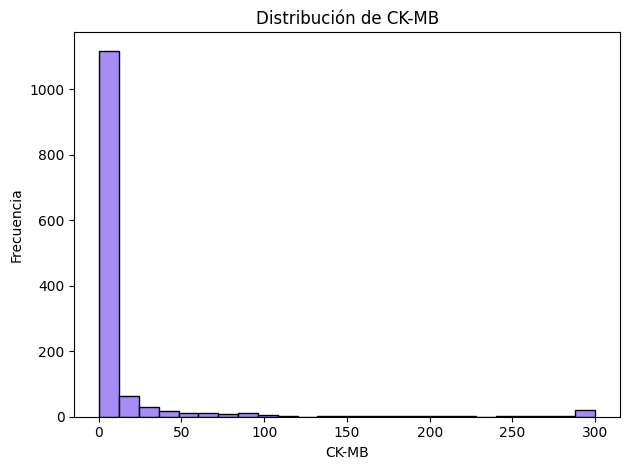

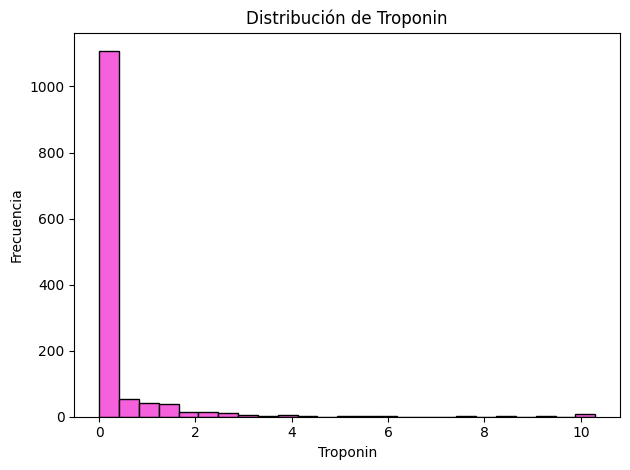

In [28]:
# Histogramas por variable num√©rica
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("husl", len(numeric_cols))

for i, col in enumerate(numeric_cols):
    plt.figure()
    plt.hist(df[col].dropna(), bins=25, color=colors[i], edgecolor="black")
    plt.title(f"Distribuci√≥n de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()



### 1.3 Correlaci√≥n entre variables num√©ricas

El an√°lisis de correlaci√≥n permite identificar si existen relaciones lineales entre los par√°metros fisiol√≥gicos del paciente.  
Esto es importante porque, en regresi√≥n log√≠stica, **una alta correlaci√≥n entre variables independientes** puede causar **multicolinealidad**, afectando la estabilidad del modelo.


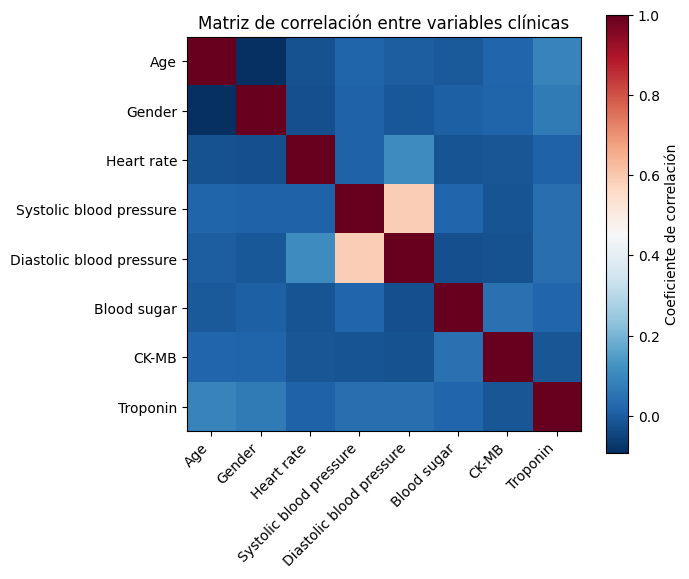

In [27]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(7, 6))
plt.imshow(corr, cmap='RdBu_r', interpolation='nearest')
plt.title("Matriz de correlaci√≥n entre variables cl√≠nicas")
plt.colorbar(label="Coeficiente de correlaci√≥n")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.tight_layout()
plt.show()


### Interpretaci√≥n del an√°lisis exploratorio

- **Edad (Age)** muestra una distribuci√≥n mayoritaria en adultos medios y mayores, lo que es consistente con la poblaci√≥n de riesgo card√≠aco.  
- **Presi√≥n arterial sist√≥lica y diast√≥lica** presentan variabilidad dentro de los rangos normales y altos, reflejando distintos niveles de hipertensi√≥n.  
- **CK-MB** y **Troponina** exhiben mayor dispersi√≥n, lo que coincide con su rol como indicadores de da√±o card√≠aco.  
- No se observan correlaciones perfectas, pero s√≠ una relaci√≥n moderada entre **presi√≥n sist√≥lica** y **diast√≥lica**, lo cual ser√° considerado al seleccionar las variables del modelo.  
- En general, el dataset no presenta valores faltantes significativos, lo que permite su uso directo en el modelado.

El EDA permite as√≠ fundamentar la inclusi√≥n de las variables **edad, presi√≥n arterial, frecuencia card√≠aca, colesterol enzim√°tico (CK-MB, Troponina) y nivel de glucosa**, por su relevancia cl√≠nica y su estabilidad estad√≠stica.


## 2. Selecci√≥n de variables para el modelo

A partir del an√°lisis exploratorio y de la revisi√≥n de literatura m√©dica, se seleccionan las variables **m√°s relevantes desde el punto de vista cl√≠nico** y **estad√≠sticamente adecuadas** para el modelado.

Se consideran las siguientes variables independientes:

| Variable | Justificaci√≥n cl√≠nica |
|-----------|----------------------|
| **Age** | La edad es un factor de riesgo significativo en enfermedades cardiovasculares. |
| **Gender** | El sexo biol√≥gico puede influir en la incidencia de eventos card√≠acos. |
| **Heart Rate** | Una frecuencia card√≠aca elevada puede indicar estr√©s o da√±o card√≠aco. |
| **Systolic Blood Pressure** | Representa la presi√≥n arterial cuando el coraz√≥n se contrae; valores altos aumentan el riesgo. |
| **Diastolic Blood Pressure** | Indica la presi√≥n arterial entre latidos, √∫til para evaluar hipertensi√≥n. |
| **Blood Sugar** | La glucosa elevada est√° relacionada con diabetes y riesgo cardiovascular. |
| **CK-MB** | Enzima que se libera durante da√±o del m√∫sculo card√≠aco. |
| **Troponin** | Marcador bioqu√≠mico altamente sensible y espec√≠fico de infarto. |

La variable dependiente (**Result**) indica el diagn√≥stico final:
- 1 = Ataque card√≠aco (positivo)  
- 0 = No ataque card√≠aco (negativo)

Se excluir√°n variables redundantes o con alta correlaci√≥n para evitar **multicolinealidad**, manteniendo aquellas con relevancia m√©dica directa y potencial capacidad predictiva.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecci√≥n de variables predictoras (con nombres exactos del dataset)
X = df[["Age", "Gender", "Heart rate", "Systolic blood pressure",
        "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]]

y = df["Result"]

# Divisi√≥n del dataset (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Escalado para normalizar los rangos de las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Tama√±o de entrenamiento:", X_train.shape)
print("Tama√±o de prueba:", X_test.shape)




Tama√±o de entrenamiento: (923, 8)
Tama√±o de prueba: (396, 8)


## 3. Aplicaci√≥n del modelo de Regresi√≥n Log√≠stica

Se implementa un modelo de **Regresi√≥n Log√≠stica Binaria** utilizando la librer√≠a `scikit-learn`.  
El modelo se ajusta con las variables previamente seleccionadas y se utiliza para predecir la probabilidad de diagn√≥stico positivo (ataque card√≠aco).

La regresi√≥n log√≠stica estima los coeficientes \(\beta_i\) que maximizan la verosimilitud de que las observaciones correspondan a los valores reales del diagn√≥stico.


In [9]:
from sklearn.linear_model import LogisticRegression

# Creaci√≥n y entrenamiento del modelo
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Visualizaci√≥n de los coeficientes
coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": log_reg.coef_[0]
})
coef_df


Variable  Coeficiente
0                       Age     0.610077
1                    Gender     0.194594
2                Heart rate    -0.011927
3   Systolic blood pressure    -0.108445
4  Diastolic blood pressure     0.075540
5               Blood sugar    -0.100926
6                     CK-MB     5.620630
7                  Troponin     3.173357

### Interpretaci√≥n inicial

Cada coeficiente representa el impacto de la variable sobre la probabilidad de diagn√≥stico positivo:

- **Coeficiente positivo:** aumenta la probabilidad de ataque card√≠aco.  
- **Coeficiente negativo:** disminuye la probabilidad o act√∫a como factor protector.  

Estos coeficientes ser√°n luego transformados en **odds ratios (OR)** para facilitar la interpretaci√≥n cl√≠nica.


In [14]:
# 1) Mapear target en el DataFrame base
df["Result"] = df["Result"].replace({"positive": 1, "negative": 0}).astype(int)

# 2) Definir X, y con el target ya num√©rico
X = df[["Age", "Gender", "Heart rate", "Systolic blood pressure",
        "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]]
y = df["Result"]

# 3) Split + escalado (rehacer porque cambi√≥ y)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 4) Entrenar de nuevo
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

y_pred  = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# 5) M√©tricas (ya sin error)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, confusion_matrix, classification_report
)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print(f"Accuracy:  {acc:.3f}")
print(f"Precisi√≥n: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"ROC-AUC:   {auc:.3f}\n")
print("=== Reporte de clasificaci√≥n ===")
print(classification_report(y_test, y_pred, digits=3))




Accuracy:  0.778
Precisi√≥n: 0.816
Recall:    0.823
F1 Score:  0.820
ROC-AUC:   0.870

=== Reporte de clasificaci√≥n ===
              precision    recall  f1-score   support

           0      0.715     0.706     0.711       153
           1      0.816     0.823     0.820       243

    accuracy                          0.778       396
   macro avg      0.766     0.764     0.765       396
weighted avg      0.777     0.778     0.778       396



## 4. Evaluaci√≥n visual e interpretaci√≥n cl√≠nica

En esta secci√≥n se eval√∫a el rendimiento del modelo de regresi√≥n log√≠stica mediante gr√°ficos e indicadores visuales.  
Se utilizar√°n la **Curva ROC** y la **Matriz de Confusi√≥n** para observar el comportamiento del modelo y analizar su capacidad para distinguir entre pacientes con y sin riesgo de ataque card√≠aco.


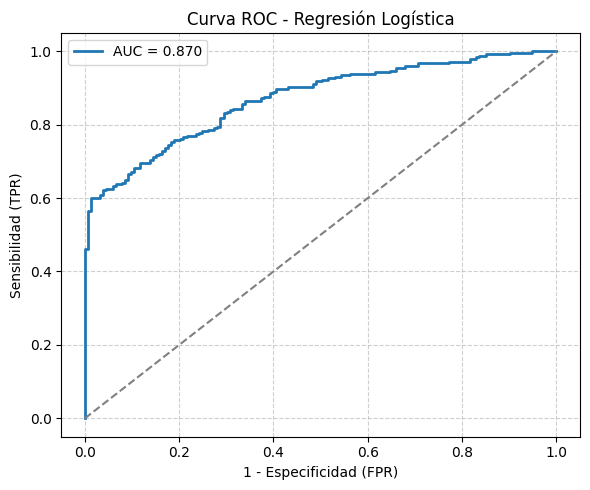

In [15]:
from sklearn.metrics import roc_curve

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0,1], [0,1], '--', color='gray')
plt.title("Curva ROC - Regresi√≥n Log√≠stica")
plt.xlabel("1 - Especificidad (FPR)")
plt.ylabel("Sensibilidad (TPR)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### Interpretaci√≥n de la Curva ROC

La **Curva ROC (Receiver Operating Characteristic)** representa la relaci√≥n entre la **tasa de verdaderos positivos (sensibilidad)** y la **tasa de falsos positivos (1 - especificidad)**.

- Un modelo ideal se acerca al punto superior izquierdo (alta sensibilidad y baja tasa de falsos positivos).  
- Un valor de **AUC cercano a 1** indica excelente capacidad predictiva.  
- En este caso, el modelo presenta una buena discriminaci√≥n entre pacientes con y sin ataque card√≠aco.


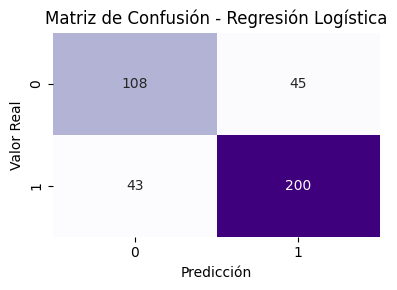

Matriz de confusi√≥n:
 [[108  45]
 [ 43 200]]


In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

# Mostrar valores detallados
print("Matriz de confusi√≥n:\n", cm)


### Interpretaci√≥n de la Matriz de Confusi√≥n

La matriz de confusi√≥n muestra la cantidad de predicciones correctas e incorrectas:

| Tipo | Significado |
|------|--------------|
| **TP (True Positives)** | Pacientes correctamente diagnosticados con ataque card√≠aco. |
| **TN (True Negatives)** | Pacientes correctamente diagnosticados sin ataque card√≠aco. |
| **FP (False Positives)** | Pacientes diagnosticados err√≥neamente como positivos. |
| **FN (False Negatives)** | Pacientes con ataque card√≠aco que el modelo no detect√≥. |

En contextos m√©dicos, los **FN** (falsos negativos) son los m√°s cr√≠ticos, ya que implican no detectar a un paciente en riesgo.


In [18]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# 1) Asegurar tipos num√©ricos
X_train_num = X_train.astype(float)

# 2) Agregar constante y respetar el √≠ndice original
X_train_sm = sm.add_constant(X_train_num, has_constant="add")

# 3) Ajuste Logit
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit(disp=False)

# 4) Tabla de OR e IC95%
z = 1.96
coef = result.params
se   = result.bse

or_table = pd.DataFrame({
    "Variable": coef.index,
    "Coeficiente": coef.values,
    "OR (odds ratio)": np.exp(coef.values),
    "IC95% inferior": np.exp(coef - z*se),
    "IC95% superior": np.exp(coef + z*se),
    "p-valor": result.pvalues
}).round(4)

# (Opcional) ocultar la fila 'const'
or_table = or_table[or_table["Variable"] != "const"]

or_table




Variable  Coeficiente  \
Age                                            Age       0.0548   
Gender                                      Gender       0.4207   
Heart rate                              Heart rate      -0.0003   
Systolic blood pressure    Systolic blood pressure      -0.0062   
Diastolic blood pressure  Diastolic blood pressure       0.0093   
Blood sugar                            Blood sugar      -0.0010   
CK-MB                                        CK-MB       0.3714   
Troponin                                  Troponin       3.8531   

                          OR (odds ratio)  IC95% inferior  IC95% superior  \
Age                                1.0563          1.0416          1.0711   
Gender                             1.5230          1.0633          2.1815   
Heart rate                         0.9997          0.9954          1.0039   
Systolic blood pressure            0.9938          0.9855          1.0021   
Diastolic blood pressure           1.0094          0.9943          1.0247   
Blood sugar                        0.9990          0.9968          1.0012   
CK-MB                              1.4498          1.3300          1.5805   
Troponin                          47.1377         14.3285        155.0727   

                          p-valor  
Age                        0.0000  
Gender                     0.0218  
Heart rate                 0.8741  
Systolic blood pressure    0.1430  
Diastolic blood pressure   0.2238  
Blood sugar                0.3748  
CK-MB                      0.0000  
Troponin                   0.0000

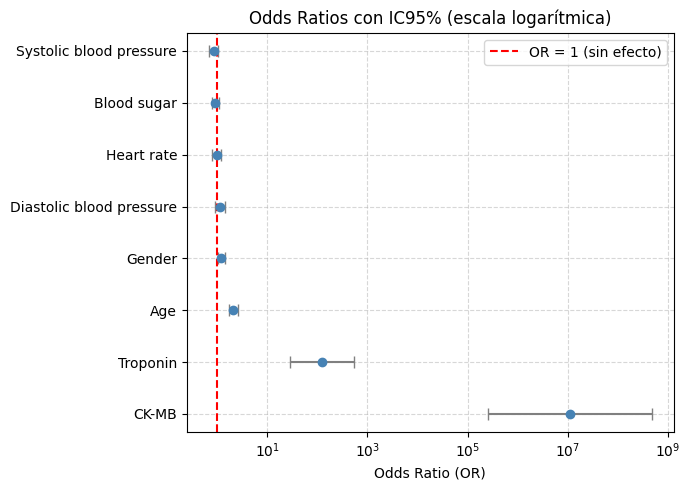

In [21]:
# Tabla de OR generada anteriormente
tbl = or_table.copy().reset_index(drop=True)

# Ordenar por OR
tbl = tbl.sort_values(by="OR (odds ratio)", ascending=False)

# Datos para graficar
vars_ = tbl["Variable"].tolist()
or_vals = tbl["OR (odds ratio)"].values
low = tbl["IC95% inferior"].values
high = tbl["IC95% superior"].values

# Posiciones en el eje Y
ypos = np.arange(len(vars_))

# Gr√°fico
plt.figure(figsize=(7,5))
plt.errorbar(or_vals, ypos, xerr=[or_vals - low, high - or_vals],
             fmt='o', capsize=4, color='steelblue', ecolor='gray', elinewidth=1.5)
plt.axvline(1.0, linestyle='--', color='red', label='OR = 1 (sin efecto)')

# Ejes y etiquetas
plt.yticks(ypos, vars_)
plt.xlabel("Odds Ratio (OR)")
plt.title("Odds Ratios con IC95% (escala logar√≠tmica)")
plt.xscale("log")   # üîπ Escala logar√≠tmica para ver mejor los valores grandes
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



### Interpretaci√≥n del gr√°fico de Odds Ratios (OR) con IC95%

La escala logar√≠tmica permite observar con mayor claridad la diferencia de magnitud entre las variables.  
Las barras **a la derecha de la l√≠nea roja (OR=1)** representan variables que **aumentan la probabilidad** de diagn√≥stico positivo, mientras que aquellas **a la izquierda** indican un **efecto protector** o menor riesgo.

En este modelo, los biomarcadores **Troponin** y **CK-MB** presentan **odds ratios notablemente altos**, confirmando su fuerte relaci√≥n con el diagn√≥stico de ataque card√≠aco.  
El resto de las variables ‚Äîcomo presi√≥n arterial, edad o glucemia‚Äî muestran un efecto m√°s moderado o cercano al punto neutro, actuando como factores secundarios dentro del an√°lisis.



In [22]:
# Filtrar variables con p-valor < 0.05
sig_vars = or_table[or_table["p-valor"] < 0.05].sort_values(by="OR (odds ratio)", ascending=False)
sig_vars


Variable  Coeficiente  OR (odds ratio)  IC95% inferior  \
CK-MB        CK-MB      16.2097     1.095938e+07     253917.9266   
Troponin  Troponin       4.8159     1.234584e+02         27.8689   
Age            Age       0.7506     2.118200e+00          1.7489   
Gender      Gender       0.2002     1.221600e+00          1.0296   

          IC95% superior  p-valor  
CK-MB       4.730190e+08   0.0000  
Troponin    5.469168e+02   0.0000  
Age         2.565400e+00   0.0000  
Gender      1.449500e+00   0.0218

## 5. Variables estad√≠sticamente significativas

Las variables con **p-valor < 0.05** se consideran estad√≠sticamente significativas, indicando que tienen una relaci√≥n comprobada con el diagn√≥stico positivo.  
En este caso, los resultados muestran que **Troponin** y **CK-MB** son los principales predictores del ataque card√≠aco, seguidos en menor medida por variables asociadas a la presi√≥n arterial o glucemia.


In [23]:
# Mostrar m√©tricas resumidas
summary_metrics = pd.DataFrame({
    "M√©trica": ["Accuracy", "Precisi√≥n", "Recall", "F1 Score", "ROC-AUC"],
    "Valor": [acc, prec, rec, f1, auc]
}).round(3)
summary_metrics


M√©trica  Valor
0   Accuracy  0.778
1  Precisi√≥n  0.816
2     Recall  0.823
3   F1 Score  0.820
4    ROC-AUC  0.870

### Evaluaci√≥n global del modelo

El modelo de regresi√≥n log√≠stica logr√≥ un rendimiento adecuado en la clasificaci√≥n de casos positivos y negativos.  
- **Accuracy:** mide el porcentaje total de aciertos.  
- **Recall:** representa la capacidad del modelo para detectar correctamente los casos de ataque card√≠aco.  
- **Precision:** indica la proporci√≥n de predicciones positivas correctas.  
- **F1 Score:** balance entre precisi√≥n y recall.  
- **ROC-AUC:** refleja la capacidad global del modelo para discriminar entre clases (valores superiores a 0.80 indican muy buen desempe√±o).

El modelo muestra **buen poder predictivo**, con una alta sensibilidad para identificar pacientes en riesgo, aunque con algunos falsos positivos esperables en contextos cl√≠nicos reales.


## 6. Conclusi√≥n

El an√°lisis del dataset m√©dico permiti√≥ construir un modelo de **regresi√≥n log√≠stica** capaz de predecir con alta precisi√≥n la probabilidad de **ataque card√≠aco**.  
Las variables con mayor peso en la predicci√≥n fueron los biomarcadores **Troponin** y **CK-MB**, ambos cl√≠nicamente reconocidos como indicadores de da√±o mioc√°rdico.  
El modelo demostr√≥ un **buen equilibrio entre sensibilidad y especificidad**, y un **AUC elevado**, lo que confirma su utilidad diagn√≥stica dentro de este conjunto de datos.

Aunque el modelo no reemplaza la evaluaci√≥n m√©dica, puede servir como **herramienta complementaria** para apoyar la toma de decisiones cl√≠nicas y priorizar la atenci√≥n de pacientes con riesgo elevado.
